In [365]:
# Import the python library that connects to CoppeliaSim, the file is sim.py.
try:
    import sim
except:
    print('--------------------------------------------------------------')
    print('"sim.py" could not be imported. This means very probably that')
    print('either "sim.py" or the remoteApi library could not be found.')
    print('Make sure both are in the same folder as this file,')
    print('or appropriately adjust the file "sim.py"')
    print('--------------------------------------------------------------')
    print('')

import time

%pylab inline
# plt.style.use('light_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)
matplotlib.rcParams['animation.embed_limit'] = 2**128

Populating the interactive namespace from numpy and matplotlib


In [366]:
print('Program started')
sim.simxFinish(-1)  # just in case, close all opened connections
clientID = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # Connect to CoppeliaSim

if clientID != -1:
    print('Connected to remote API server')

    # Now try to retrieve data in a blocking fashion (i.e. a service call):
    res, objs = sim.simxGetObjects(clientID, sim.sim_handle_all, sim.simx_opmode_blocking)

    # Before closing the connection to CoppeliaSim, make sure that the last command sent out had time to arrive. You can guarantee this with (for example):
    sim.simxGetPingTime(clientID)

    # Now close the connection to CoppeliaSim:
    sim.simxFinish(clientID)
else:
    print('Failed connecting to remote API server')
print('Program ended')

Program started
Connected to remote API server
Program ended


In [367]:
class robot():
    
    def __init__(self, frame_name, motor_names=[], client_id=0):  
        # If there is an existing connection
        if client_id:
                self.client_id = client_id
        else:
            self.client_id = self.open_connection()
            
        self.motors = self._get_handlers(motor_names) 
        
        # Robot frame
        self.frame =  self._get_handler(frame_name)
            
        
    def open_connection(self):
        sim.simxFinish(-1)  # just in case, close all opened connections
        self.client_id = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # Connect to CoppeliaSim 
        
        if clientID != -1:
            print('Robot connected')
        else:
            print('Connection failed')
        return clientID
        
    def close_connection(self):    
        sim.simxGetPingTime(self.client_id)  # Before closing the connection to CoppeliaSim, make sure that the last command sent out had time to arrive.
        sim.simxFinish(self.client_id)  # Now close the connection to CoppeliaSim:
        print('Connection closed')
    
    def isConnected(self):
        c,result = sim.simxGetPingTime(self.client_id)
        # Return true if the robot is connected
        return result > 0         
        
    def _get_handler(self, name):
        err_code, handler = sim.simxGetObjectHandle(self.client_id, name, sim.simx_opmode_blocking)
        return handler
    
    def _get_handlers(self, names):
        handlers = []
        for name in names:
            handler = self._get_handler(name)
            handlers.append(handler)
        
        return handlers

    def send_motor_velocities(self, vels):
        for motor, vel in zip(self.motors, vels):
            err_code = sim.simxSetJointTargetVelocity(self.client_id, 
                                                      motor, vel, sim.simx_opmode_streaming)      
            
    def set_position(self, position, relative_object=-1):
        if relative_object != -1:
            relative_object = self._get_handler(relative_object)        
        sim.simxSetObjectPosition(clientID, self.frame, relative_object, position, sim.simx_opmode_oneshot)
        
    def simtime(self):
        return sim.simxGetLastCmdTime(self.client_id)
    
    def get_position(self, relative_object=-1):
        # Get position relative to an object, -1 for global frame
        if relative_object != -1:
            relative_object = self._get_handler(relative_object)
        res, position = sim.simxGetObjectPosition(self.client_id, self.frame, relative_object, sim.simx_opmode_blocking)        
        return array(position)
    
    def get_object_position(self, object_name):
        # Get Object position in the world frame
        err_code, object_h = sim.simxGetObjectHandle(self.client_id, object_name, sim.simx_opmode_blocking)
        res, position = sim.simxGetObjectPosition(self.client_id, object_h, -1, sim.simx_opmode_blocking)
        return array(position)
    
    def get_object_relative_position(self, object_name):        
        # Get Object position in the robot frame
        err_code, object_h = sim.simxGetObjectHandle(self.client_id, object_name, sim.simx_opmode_blocking)
        res, position = sim.simxGetObjectPosition(self.client_id, object_h, self.frame, sim.simx_opmode_blocking)
        return array(position)

Robot connected
Robot position: (7.62, 8.53) 


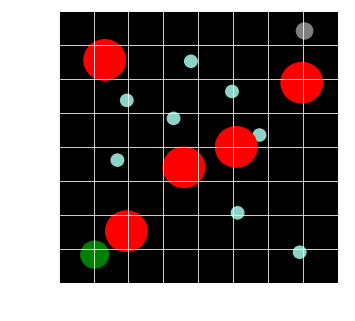

In [369]:
# Joint name in coppelia
motor_names = ['Omnirob_FLwheel_motor', 'Omnirob_FRwheel_motor', 'Omnirob_RRwheel_motor', 'Omnirob_RLwheel_motor']
r = robot('Omnirob', motor_names)  # Create an instance of our robot
# Initial locations
robot_position = r.get_position()
print('Robot position: (%.2f, %.2f) '%(robot_position[0], robot_position[1]))

p1 = r.get_object_position('Cylinder5')
p2 = r.get_object_position('Cylinder6')
p3 = r.get_object_position('Cylinder7')
p4 = r.get_object_position('Cylinder8')
p5 = r.get_object_position('Cylinder9')
p6 = r.get_object_position('Cylinder10')
p7 = r.get_object_position('Cylinder11')
p8 = r.get_object_position('Cylinder12')
p9 = r.get_object_position('Cuboid0')
p10 = r.get_object_position('Cuboid1')
p11 = r.get_object_position('Cuboid3')
p12 = r.get_object_position('Cuboid4')
p13 = r.get_object_position('Cuboid6')
p14 = r.get_object_position('Sphere9')

fig, ax = plt.subplots(figsize=(5, 5))

a_circle1 = plt.Circle((p1[0], p1[1]), .5)
a_circle2 = plt.Circle((p2[0], p2[1]), .5)
a_circle3 = plt.Circle((p3[0], p3[1]), .5)
a_circle4 = plt.Circle((p4[0], p4[1]), .5)
a_circle5 = plt.Circle((p5[0], p5[1]), .5)
a_circle6 = plt.Circle((p6[0], p6[1]), .5)
a_circle7 = plt.Circle((p7[0], p7[1]), .5)
a_circle8 = plt.Circle((p8[0], p8[1]), .5)
a_circle9 = plt.Circle((p9[0], p9[1]), 1.5)
a_circle10 = plt.Circle((p10[0], p10[1]), 1.5)
a_circle11 = plt.Circle((p11[0], p11[1]),1.5)
a_circle12 = plt.Circle((p12[0], p12[1]), 1.5)
a_circle13 = plt.Circle((p13[0], p13[1]), 1.5)
a_circle14 = plt.Circle((p14[0], p14[1]), 1.0)
a_circle15 = plt.Circle((robot_position[0], robot_position[1]), .6)
a_circle9.set_color("red")
a_circle10.set_color("red")
a_circle11.set_color("red")
a_circle12.set_color("red")
a_circle13.set_color("red")
a_circle14.set_color("green")
a_circle15.set_color("gray")

ax.grid(True)
ax.set(xlim=(-10, 10), ylim = (-10, 10))
xlabel('x(m)')
ylabel('y(m)')
ax.add_artist(a_circle1)
ax.add_artist(a_circle2)
ax.add_artist(a_circle3)
ax.add_artist(a_circle4)
ax.add_artist(a_circle5)
ax.add_artist(a_circle6)
ax.add_artist(a_circle7)
ax.add_artist(a_circle8)
ax.add_artist(a_circle9)
ax.add_artist(a_circle10)
ax.add_artist(a_circle11)
ax.add_artist(a_circle12)
ax.add_artist(a_circle13)
ax.add_artist(a_circle14)
ax.add_artist(a_circle15)

In [359]:
# Potential functions
def force_goal(x, y, goal):
    goal_x, goal_y, k_goal = goal
    Fx_goal, Fy_goal = k_goal * (goal_x - x), k_goal *(goal_y - y)
    return Fx_goal, Fy_goal

def force_obstacle(x, y, obstacle):
    (obs_x, obs_y, k_obs) = obstacle
    dist_x, dist_y = x - obs_x, y - obs_y
    dist_obs = np.hypot(dist_x, dist_y)
    Fx_obs = (dist_x / dist_obs) * k_obs / dist_obs ** 3
    Fy_obs = (dist_y / dist_obs) * k_obs / dist_obs ** 3

    return Fx_obs, Fy_obs 

def total_force(x, y, goal, obstacles):
    Fx, Fy = force_goal(x, y, goal)

    for obs in obstacles:
        Fo_x, Fo_y = force_obstacle(x, y, obs)
        Fx += Fo_x
        Fy += Fo_y
    return Fx, Fy
def plot_vector_field(ax=plt, fmax = .15):
    X, Y = np.meshgrid(np.arange(-10, 10, .5), np.arange(-10, 10, .5))

    # Vector field of the forces
    Fx, Fy = total_force(X, Y, goal, obstacles)

    # For visualization
    F_m = np.hypot(Fx, Fy)
    Fx[F_m > fmax], Fy[F_m > fmax] = None, None
    # Plot
    # quiver(X, Y, Fx, Fy,  F_m, color='0.4', scale=None)
    ax.quiver(X, Y, Fx, Fy, color='0.8')
    

    

def simulate(q, goal, obstacles, num_steps, delta_time):
    trajectory = []
    for i in range(num_steps):
        force = total_force(q[0], q[1], goal, obstacles)
        
        # Robot velocity follows the force vector
        vel = np.array(force)
        
        # Integrate
        q += vel * delta_time
#         print(delta_time)
#         vx,vy = vel * delta_time
#         r.send_motor_velocities([-vy - vx, vy - vx, vy + vx, -vy + vx])
        trajectory.append(np.copy(q))
        
    
    return np.array(trajectory)
def move(goal,obstacles,num_steps,delta_time):
    for i in range(num_steps):
        q = r.get_position()
        force = total_force(q[0], q[1], goal, obstacles)
        # Robot velocity follows the force vector
        vel = np.array(force)
        vx, vy = (vel * delta_time)
        #print(q)
        r.send_motor_velocities([-vy - vx, vy - vx, vy + vx, -vy + vx])
        pause(0.05)
    r.send_motor_velocities([0, 0, 0, 0])

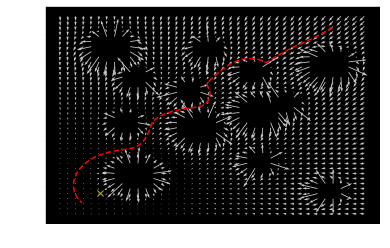

In [360]:
# Goal
goal = [p14[0], p14[1], .002]
# Obstacles (x, y, k), where k is the rejection multiplier
obstacles = [[p1[0], p1[1], 0.05],
              [p2[0], p2[1], 0.05],
              [p3[0], p3[1], 0.05],
              [p4[0], p4[1], 0.05],
              [p5[0], p5[1], 0.05],
              [p6[0], p6[1], 0.05],
              [p7[0], p7[1], 0.05],
              [p8[0], p8[1], 0.05],
              [p9[0], p9[1], .21],
              [p10[0], p10[1], .21],
              [p11[0], p11[1], 0.21],
              [p12[0], p12[1], .21],
              [p13[0], p13[1], 0.21]
              ]

# Initial location of the robot
q = np.array((robot_position[0], robot_position[1]))

# Shoe result
trajectory = simulate(q, goal, obstacles,num_steps=1100, delta_time=5)
plot(trajectory[:,0], trajectory[:,1], 'r--')
plot(goal[0], goal[1], 'yx')
plot_vector_field()


In [354]:
move(goal, obstacles,num_steps=1100, delta_time=300)